<a href="https://colab.research.google.com/github/ziri025/neww/blob/main/Copy_of_proj10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning algorithm to predict break in Waspaloy (metal alloy)

In [ ]:

#import initial necessary library and classes
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
from sklearn.model_selection import train_test_split
import xgboost as xgb
from google.colab import files 
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sb


import matplotlib.pyplot as plt
from matplotlib import style

3 models will be used on the data. All follow  regression

In [ ]:
#import 3 models(regression based algorithms for use on data)

#stat model
import statsmodels.api as sm
from termcolor import colored as cl


#Extreme gradient model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#Stochastic gradient model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#The data is fed into 
uploaded = files.upload()
dataset = pd.read_csv("newproj2.csv")
df= dataset 

Saving newproj2.csv to newproj2.csv


In [ ]:
dataset.head()

,strain,temperature,strainrate,stress
0,0.00,-180,4000,717
1,0.05,-180,4000,910
2,0.10,-180,4000,1051
3,0.15,-180,4000,1152
4,0.20,-180,4000,1221


In [ ]:
dataset.tail()

,strain,temperature,strainrate,stress
237,0.30,750,7500,743
238,0.35,750,7500,753
239,0.40,750,7500,750
240,0.45,750,7500,738
241,0.50,750,7500,719


Graphical representation of data

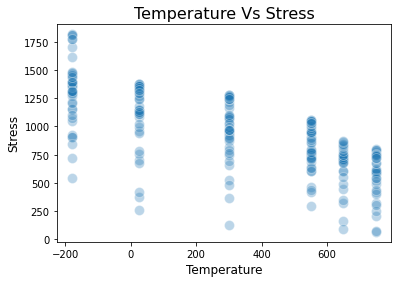

In [ ]:
plt.scatter(x = 'temperature', y = 'stress', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Temperature Vs Stress', fontsize = 16)
plt.ylabel('Stress', fontsize = 12)
plt.xlabel('Temperature', fontsize = 12)

plt.savefig('temperature.png')

In [ ]:
X1_var = df[['temperature', 'strainrate' , 'strain']] # independent variable
y_var = df['stress'] # dependent variable

Training

Using Stat regression model to predict stress in Wasaploy

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stress   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     365.7
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           8.49e-89
Time:                        20:23:25   Log-Likelihood:                -1553.9
No. Observations:                 242   AIC:                             3116.
Df Residuals:                     238   BIC:                             3130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         563.6390     45.143     12.486      0.000     474.709     652.569
temperature    -0.7586      0.029    -26.207      0.000      -0.816      -0.702
strainrate      0.0604      0.007      8.420      0.000       0.046       0.074
strain       1100.6860     60.977     18.051      0.000     980.562    1220.810
==============================================================================
Omnibus:                       30.103   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.721
Skew:                          -0.845   Prob(JB):                     3.91e-09
Kurtosis:                       3.991   Cond. No.                     3.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

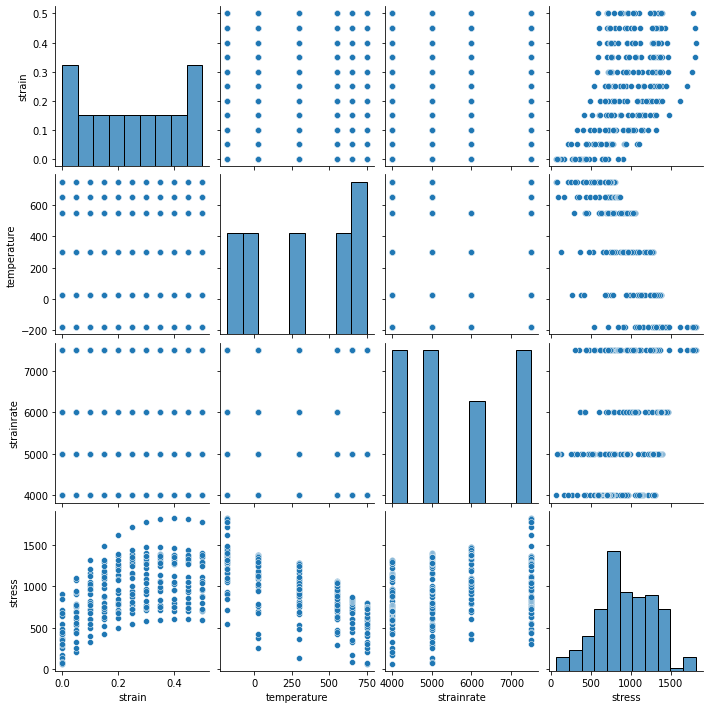

In [ ]:

sm_X1_var = sm.add_constant(X1_var)

mlr_model = sm.OLS(y_var, sm_X1_var) #ordinary least square
mlr_reg = mlr_model.fit()

# find some positive or negative linear relationships by implementing scatter plots. statistical visualization between variables

sb.pairplot(df)
plt.savefig('pairplor.png')


#summary
mlr_reg.summary()

Using eXtreme Gradient Boosting regression model to predict stress with data for Wasaploy

In [ ]:
X= df[['temperature', 'strainrate' , 'strain']] # independent variable
y = df['stress'] # dependent variable

In [ ]:

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train,y_train)
#make prediction
testpred =model.predict(X_test)
print(testpred)


 
mae = mean_absolute_error(y_test, testpred)
print('MAE: %.3f' % mae)

(162, 3) (80, 3) (162,) (80,)
[1281.1702   548.76904 1750.009   1200.2698   494.708   1233.662
  389.84784  465.27338 1333.2892   590.45746  791.0378  1343.4023
 1472.4823   775.60535  761.32745 1802.4485   971.0733  1247.0298
  837.46326  527.0725   829.1413  1326.4951   583.3312   979.90283
 1138.6893  1141.243   1126.1586   747.82465  746.9252   969.77155
  760.4932   351.16293  678.45874  647.2699   702.1817   608.84406
 1086.2219  1523.6564  1239.0695   530.84    1413.0779   806.56464
 1316.648    661.467   1074.9119   584.8833  1348.9534  1189.1263
  677.24146  954.27637  699.46594 1134.7175  1762.3204    67.7145
 1003.60596 1411.1752  1001.46234 1001.7997   418.08716 1043.5753
 1045.238   1220.2639   813.25977  494.96048  720.15405  631.35315
  795.1164  1131.808   1230.9656  1203.7946   859.41626 1189.8159
  477.587   1200.9198   539.34955  385.4056   609.0003  1791.6492
  990.8426   955.17084]
MAE: 47.170


Using SGDRegressor(Stochastic gradient model)

In [ ]:
X= df[['temperature', 'strainrate' , 'strain']] # independent variable
y = df['stress'] # dependent variable

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
SGDReg =linear_model.SGDRegressor(
   max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True,   learning_rate='invscaling'
)
SGDReg.fit(X_train, y_train)
scores=SGDReg.score(X_train, y_train)

ypreds = SGDReg.predict(X_test)
print('r2', scores)




# build the scaler model
scaler = MinMaxScaler()

# fit using the train set
scaler.fit(X_train,y_train)
#transform test
testpres =scaler.transform(X_test)
w_test =scaler.transform(y_test)

print(testpres)


# evaluate predictions
r2=r2_score(w_test, testpres)
print('r2',r2)






#cross validation
cv_score = cross_val_score(SGDReg, X, y, cv = 10)
print("CV mean score: ", cv_score.mean())


ypred = SGDReg.predict(X_test)

mse = mean_squared_error(y_test, ypreds)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
 



r2 0.288783811458186
[[0.22043011 0.57142857 0.9       ]
 [0.89247312 0.         0.2       ]
 [0.         1.         1.        ]
 [0.51612903 1.         0.9       ]
 [0.78494624 1.         0.        ]
 [0.         0.57142857 0.2       ]
 [0.51612903 0.57142857 0.        ]
 [0.51612903 1.         0.        ]
 [0.22043011 0.57142857 0.7       ]
 [0.22043011 1.         0.        ]
 [0.22043011 1.         0.1       ]
 [0.22043011 1.         0.6       ]
 [0.         0.57142857 0.7       ]
 [1.         1.         1.        ]
 [0.89247312 0.28571429 0.5       ]
 [0.         1.         0.8       ]
 [0.51612903 0.         0.9       ]
 [0.22043011 0.57142857 1.        ]
 [0.89247312 0.28571429 1.        ]
 [0.78494624 0.         0.        ]
 [1.         0.28571429 1.        ]
 [0.22043011 0.28571429 0.9       ]
 [0.         0.28571429 0.        ]
 [0.78494624 0.57142857 0.6       ]
 [0.22043011 0.         0.5       ]
 [0.22043011 0.         0.8       ]
 [0.51612903 1.         0.3       ]
 [0.784

ValueError: ignored